In [ ]:
!pip install opencv-python
!pip install matplotlib

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Basic

## Loading

In [3]:
# uploaded = files.upload("people.png")  # Upload your image (e.g., 'image.jpg')
# img_path = list(uploaded.keys())[0]  # Get the filename
img = cv2.imread("people.png")  # Load the image

In [ ]:

cv2.imshow("Displayed Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# or Convert the image to RGB format for displaying with matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

## Resize

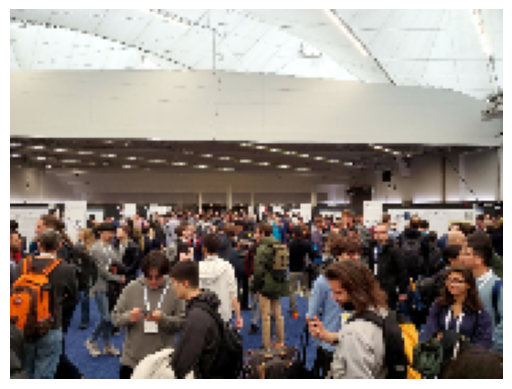

In [5]:
# Rescale function
def rescale_frame(frame, scale=0.5):
    height = int(frame.shape[0] * scale)
    width = int(frame.shape[1] * scale)
    return cv2.resize(frame, (width, height)) # (np image object, (width, height))

rescaled_img = rescale_frame(img, scale=0.3)
plt.imshow(cv2.cvtColor(rescaled_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

## Save Image

In [ ]:
cv2.imwrite('output.jpg', rescaled_img)
print("Image saved as 'output.jpg'")

## Crop

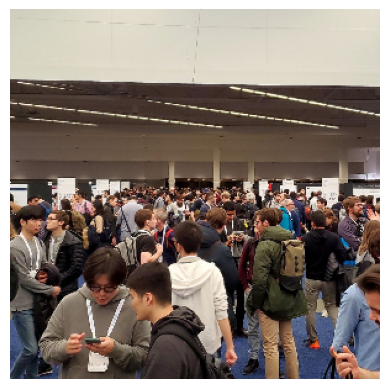

In [6]:
cropped = img[100:400, 100:400] # Slicing
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

## Draw shape

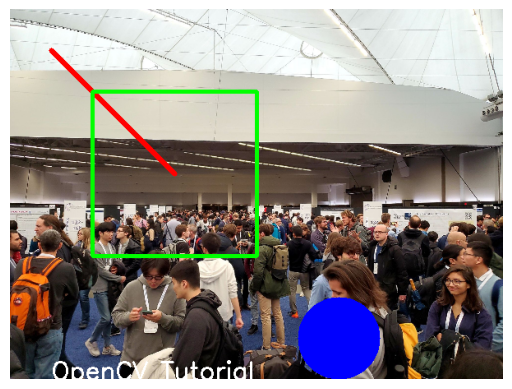

In [7]:
# Create a copy to draw on
draw_img = img.copy()

# Draw a line (red, thickness 5)
cv2.line(draw_img, (50, 50), (200, 200), (0, 0, 255), 5)

# Draw a rectangle (green, thickness 3)
cv2.rectangle(draw_img, (100, 100), (300, 300), (0, 255, 0), 3)

# Draw a circle (blue, filled)
cv2.circle(draw_img, (400, 400), 50, (255, 0, 0), -1)

# Add text (white, font scale 1)
cv2.putText(draw_img, 'OpenCV Tutorial', (50, 450), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

plt.imshow(cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

## Convert

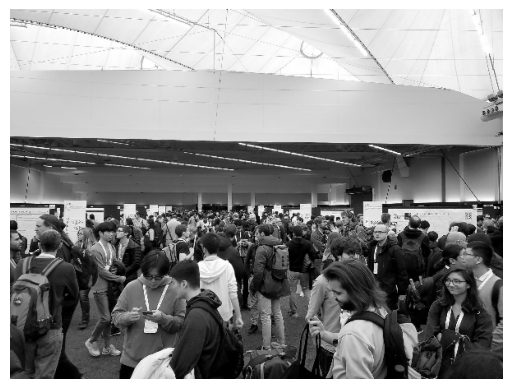

In [8]:
# Convert to grayscale
gray = img.copy()
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [ ]:
# Convert to HSV
hsv = img.copy()
hsv = cv2.cvtColor(hsv, cv2.COLOR_BGR2HSV)

plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

## Immediate

## Canny Edge Detection

In [ ]:
edges = cv2.Canny(img, 100, 200)  # Lower and upper thresholds
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

## Thresholding

In [ ]:
# Convert to grayscale first
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Simple thresholding
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

##  Image Transformations (Translation, Rotation)

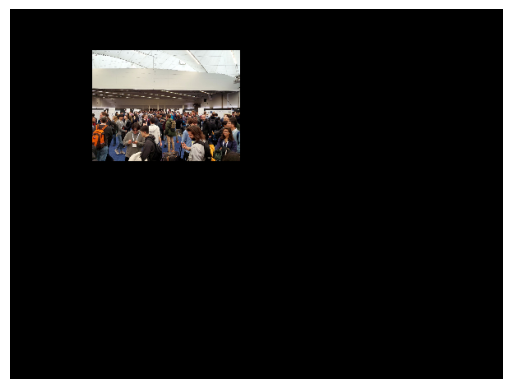

In [9]:
h, w = img.shape[:2]
M = np.float32([[1, 0, 100], [0, 1, 50]])  # Shift by (100, 50)
translated = cv2.warpAffine(rescaled_img, M, (w, h))

plt.imshow(cv2.cvtColor(translated, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [ ]:
M = cv2.getRotationMatrix2D((w//2, h//2), 45, 1)  # Rotate 45 degrees
rotated = cv2.warpAffine(img, M, (w, h))

plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

## Advanced

## Contour Detection

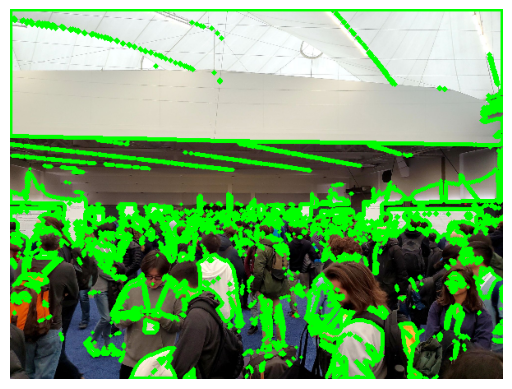

In [10]:
# Convert to grayscale and threshold
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original image
contour_img = img.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

## Color Channel Splitting and Merging

In [ ]:
# Split into B, G, R channels
b, g, r = cv2.split(img)

# Display individual channels
plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
# cv2_imshow(g)
# cv2_imshow(r)

# Merge back
merged = cv2.merge([b, g, r])
plt.imshow(cv2.cvtColor(merged, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [ ]:
# Function to increase contrast using histogram equalization
def enhance_contrast(channel):
    return cv2.equalizeHist(channel)

# Enhance contrast
b_high = enhance_contrast(b)
g_high = enhance_contrast(g)
r_high = enhance_contrast(r)

# Display enhanced channels

plt.imshow(cv2.cvtColor(b_high, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# cv2_imshow(g_high)
# cv2_imshow(r_high)

# Masking

In [ ]:
# Create a circular mask
mask = np.zeros(img.shape[:2], np.uint8)
cv2.circle(mask, (img.shape[1]//2, rescaled_img.shape[0]//2), 100, 255, -1)

# Apply mask
masked = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

## Histogram Computation

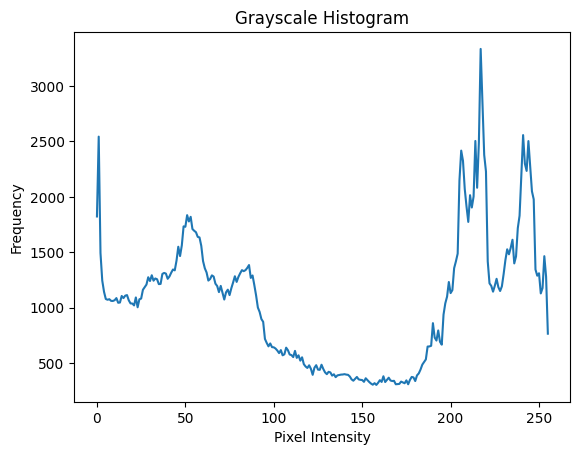

In [11]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Compute histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Plot using matplotlib (optional, requires matplotlib)
plt.plot(hist)
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

## Morphological Transformations

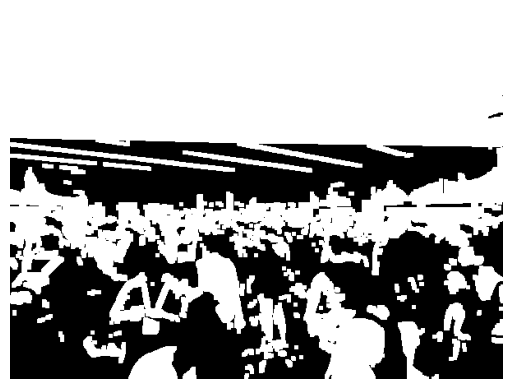

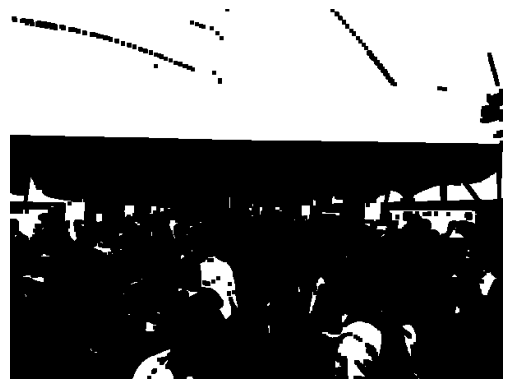

In [12]:
# Convert to grayscale and threshold
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Define a kernel
kernel = np.ones((5, 5), np.uint8)

# Dilation (expands white regions)
dilated = cv2.dilate(thresh, kernel, iterations=1)
plt.imshow(cv2.cvtColor(dilated, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Erosion (shrinks white regions)
eroded = cv2.erode(thresh, kernel, iterations=1)
plt.imshow(cv2.cvtColor(eroded, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [1]:
import cv2

# 1. Mở camera
cap = cv2.VideoCapture(0)

# 2. Load Haar Cascade để phát hiện khuôn mặt
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    # 3. Đọc frame từ camera
    ret, frame = cap.read()
    if not ret:
        print("Không thể nhận frame từ camera. Thoát.")
        break

    # 4.1 Chuyển sang grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 4.2 Phát hiện cạnh (Canny)
    edges = cv2.Canny(gray, 100, 200)

    # 4.3 Phát hiện khuôn mặt và vẽ hình chữ nhật
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    for (x1, y1, x2, y2) in faces:
        cv2.rectangle(frame, (x1, y1), (x1+x2, y1+y2), (255, 0, 0), 2)

    # 5. Hiển thị kết quả
    cv2.imshow('Original', frame)
    cv2.imshow('Canny Edges', edges)

    # 6. Thoát khi nhấn 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 7. Giải phóng camera và đóng cửa sổ
cap.release()
cv2.destroyAllWindows()


Không thể nhận frame từ camera. Thoát.
